In [ ]:
import numpy as np
import math
import random as rng
import copy
import matplotlib.pyplot as plt
from ipynb.fs.full.Universal import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def cube(dimension):
    store = []
    index = []
    empty = np.zeros((dimension, dimension)).tolist()
    first_plane = Warnsdoff(empty, start = [2,2])
    end_point = first_plane[1][-1]
    store.append(first_plane[0])
    index.append(first_plane[1])
    operations = [[end_point[0]-2, end_point[1]], [end_point[0]+2, end_point[1]], [end_point[0], end_point[1]-2], [end_point[0], end_point[1]+2]]
    for i in operations:
        for j in range(2):
            if i[j] >dimension+1 or i[j] <2:
                operations.remove(i)
    starting_point = operations[rng.choice(np.arange(len(operations)))]
    num = int(np.max(first_plane[0]))

    for i in range(4):
        
        plane = Warnsdoff(empty, start = starting_point,count = num+1 )
        end_point = plane[1][-1]
        store.append(plane[0])
        index.append(plane[1])
        operations = [[end_point[0]-2, end_point[1]], [end_point[0]+2, end_point[1]], [end_point[0], end_point[1]-2], [end_point[0], end_point[1]+2]]
        for i in operations:
            for j in range(2):
                if i[j] >dimension+1 or i[j] <2:
                    operations.remove(i)
        num += dimension*dimension
    starting_point = operations[rng.choice(np.arange(len(operations)))]
    num = int(np.max(plane[0]))
    return store, index
results = cube(15)
dimension_store = results[0]
index_store = results[1]


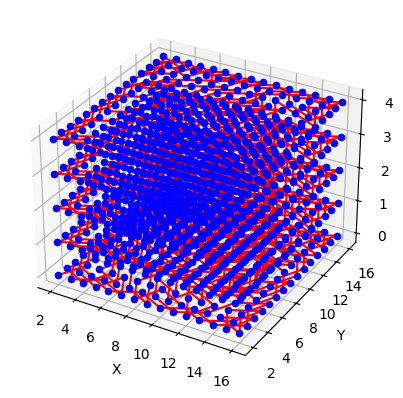

In [3]:
trimmed = []
for i in dimension_store:
    x = i[2:7, 2:7]
    trimmed.append(x)
trimmed

dim_index = []
for i in range(len(index_store)):
    for j in index_store[i]:
        index = [j[0], j[1], i]
        dim_index.append(index)

# Define specific points to draw lines between
lines=[]
for i in range(len(dim_index)-1):
    lines.append([dim_index[i], dim_index[i+1]])

# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point in the coordinates list
for coord in dim_index:
    ax.scatter(coord[0], coord[1], coord[2], color='b')

# Draw lines between the specific points
for line in lines:
    start, end = line
    ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color='r')

# Set plot labels and display
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()